In [1]:
import numpy as np
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import matplotlib.pyplot as plt
import dataframe_image as dfi
import matplotlib.pyplot as plt
import mlrose_hiive
import mlrose
import numpy as np
import pandas as pd
import time
import warnings

import pandas as pd
import numpy as np
data = pd.read_csv('loan.csv')

In [2]:
data.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [4]:
Default_mapping = {'Yes': 1,'No': 0}
data['Defaulter'] = data['Default'].map(Default_mapping)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,30.0,18.766667,8.572946,5.0,13.00,18.0,25.5,34.0
Loan Amount,30.0,51.966667,34.055212,8.0,21.25,49.0,79.5,110.0
Defaulter,30.0,0.433333,0.504007,0.0,0.00,0.0,1.0,1.0


In [6]:
data.shape

(30, 4)

In [7]:
X = data[['Income', 'Loan Amount']]
y = data['Defaulter']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
mlrose.NeuralNetwork() 

NeuralNetwork(hidden_nodes=[])

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [17]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

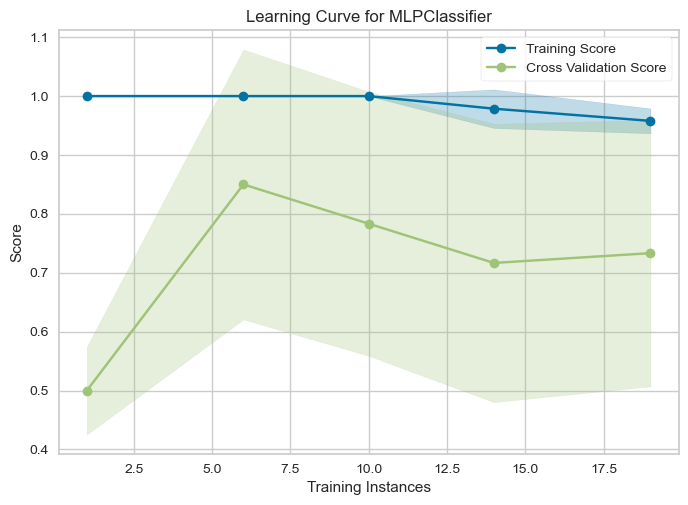

<Axes: title={'center': 'Learning Curve for MLPClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [18]:
from yellowbrick.model_selection import ValidationCurve, LearningCurve
learning_curve = LearningCurve(mlp, cv=10)


# Fit the model on the training data
learning_curve.fit(X_train, y_train)

# Plot the learning curve
learning_curve.show()

In [19]:
predictions = mlp.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))

[[4 2]
 [0 2]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.50      1.00      0.67         2

    accuracy                           0.75         8
   macro avg       0.75      0.83      0.73         8
weighted avg       0.88      0.75      0.77         8



In [23]:
len(mlp.coefs_)

4

In [24]:
len(mlp.coefs_[0])

2

In [25]:
len(mlp.intercepts_[0])

13